## OpenCV  - Python Tutorial 1

Course : Visual Recognition   
Instructor: Prof. J Dinesh  
Tuesday, 14 Jan, 2020  

#### Contents
- Introduction : Getting started with opencv
- Edge Detection : canny edges, contours
- Regions : K-means for segmentation


##### What is opencv?
__From opencv.org__

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products. The library has more than __2500__ optimized algorithms, which includes a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms.

Docs and tutorials : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

In [ ]:
# Install opencv
!pip install opencv-python
!pip install opencv-contrib-python

### Introduction

Reading, writing and displaying images. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading an image
img = cv2.imread("./cube.jpeg")
print(type(img), img.shape)

<class 'numpy.ndarray'> (680, 1000, 3)


Opencv loads the image as a numpy matrix. So all standard numpy matrix operations can be performed on it. Also note that the order of the color is BGR. While working with other libraries like matplotlib, pillow, etc., you might have to convert it into RGB.

In [ ]:
# Displaying the image
cv2.imshow("preview", img)
# The input to waitKey functions is number of milliseconds the image has to be displayed. 
# If it is set to 0, the image is displayed until it is closed. 
# This function is very handy while displaying videos to control frame rate.
cv2.waitKey(0)
cv2.destroyAllWindows()

To display inline for convenience, I will use imshow from matplotlib in this notebook instead of this.

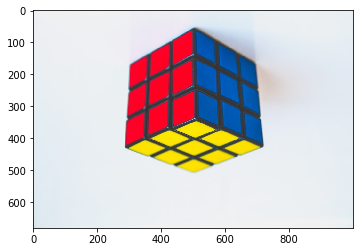

In [8]:
# One of the many functions available in opencv is cvtColor which can be used to convert image from one scale to
# another. Like BGR to RGB, grayscale, HSV etc.

# Converting to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# display
plt.imshow(gray[::-1, ::-1], cmap = "gray")

In [5]:
img[0, 0]

array([240, 238, 228], dtype=uint8)

In [ ]:
# Writing an image
# Note that here opencv takes care of the extension you want to use while writing. 
# Kind of like a simple image converter.
cv2.imwrite("cube_gray.png", gray)

Reading and writing videos : https://www.learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/

### Edge Detection

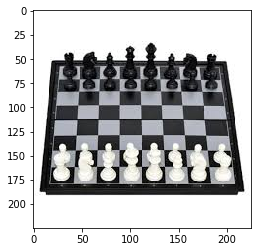

In [9]:
# Reading an image
img = cv2.imread("./chess.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#### Canny Edge Detection
##### Stages involved
- Converting to gray scale
- Gaussian blur for smoothening and removing noise
- Sobel filter to find out gradients
- Algorithm by Canny to mark pixels as edges and Non maximum surpression

Opencv function canny does all these steps except the first one. __Inputs are the image (gray scale), min and max thresholds.__ These thresholds are to be selected based on our purpose and kind of images to be dealt with.

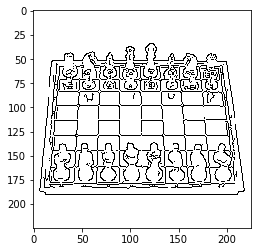

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
plt.imshow(edges, cmap = "binary")

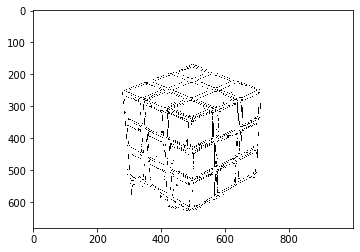

In [11]:
img = cv2.imread("./cube.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 30)
plt.imshow(edges, cmap = "binary")

Bilateral filter can help remove noise while keeping sharp edges intact.

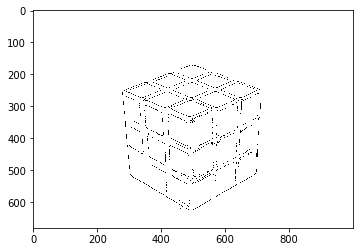

In [12]:
img = cv2.imread("./cube.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# New line
gray_filtered = cv2.bilateralFilter(gray, 7, 50, 50)

edges = cv2.Canny(gray_filtered, 10, 30)
plt.imshow(edges, cmap = "binary")

### Contours

This function takes three arguments. First is the canny image, second is contour retrieval mode, third is contour approximation method.

To draw the contours, cv2.drawContours function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

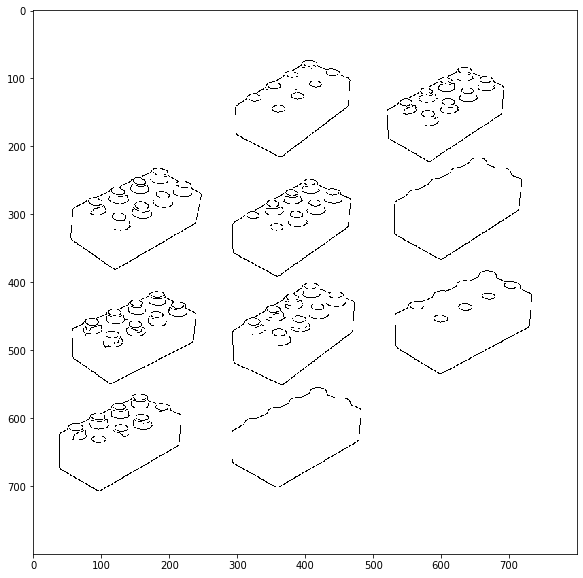

In [13]:
img = cv2.imread("./lego.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_filtered = cv2.bilateralFilter(gray, 7, 50, 50)
edges = cv2.Canny(gray_filtered, 50, 150)
plt.figure(figsize = (10, 10))
plt.imshow(edges, cmap = "binary")

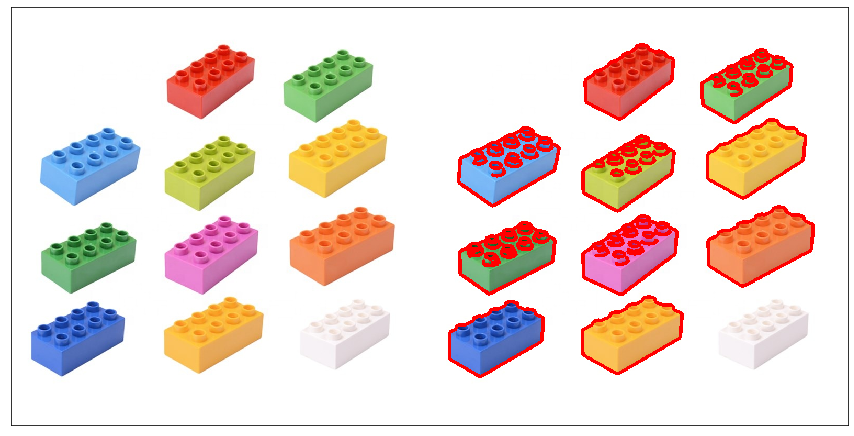

In [14]:
_, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
# Use the below line if there's any error. In older versions of opencv, function returns only contours and hierarchy
# contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
# contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of 
# (x,y) coordinates of boundary points of the object.

# Drawing contours

cnt_img = cv2.drawContours(img.copy(), contours, -1, (0, 0, 255), 5)
# to draw only one contour change the index.
# img = cv2.drawContours(img, contours, 1, (0,255,0), 3)
plt.figure(figsize=(15, 15)), plt.xticks([]), plt.yticks([])
plt.imshow(np.concatenate([img[:, :, [2, 1, 0]], cnt_img[:, :, [2, 1, 0]]], axis = 1))

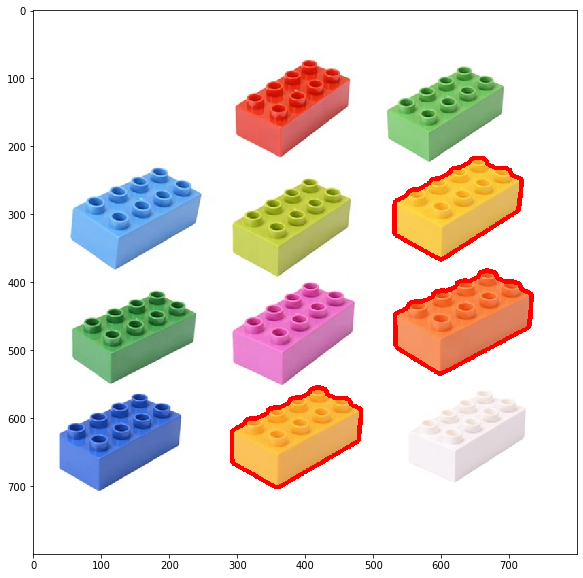

In [16]:
# Draw only the biggest contour
# To do this sort our contour list by contour area or perimeter
contours = sorted(contours, key = cv2.contourArea, reverse=True)
cnt_img = cv2.drawContours(img.copy(), contours[ : 3], -1, (0,0,255), 5)
plt.figure(figsize = (10, 10))
plt.imshow(cnt_img[:, :, [2, 1, 0]])

Check this out for all the functions that can be used on coutours in opencv. 
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html

__approxPolyDP__ It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of Douglas-Peucker algorithm.

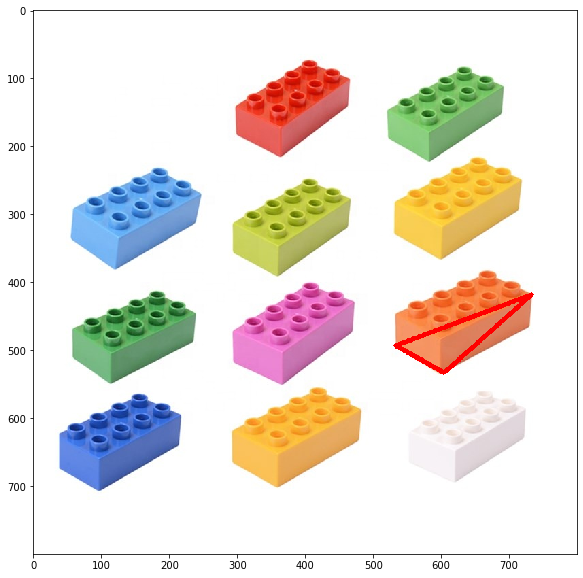

In [20]:
# Smoothening contours

# epsilon is maximum distance from contour to approximated contour. It is an accuracy parameter. 
# A wise selection of epsilon is needed to get the correct output.
epsilon = 0.1 * cv2.arcLength(contours[0], True)

approx_contour = cv2.approxPolyDP(contours[0], epsilon, True)


cnt_img = cv2.drawContours(img.copy(), [approx_contour], -1, (0,0,255), 5)
plt.figure(figsize = (10, 10))
plt.imshow(cnt_img[:, :, [2, 1, 0]])

In [18]:
print("Original Contour", contours[0].shape)
# Lets see the coordinates of the sharpened contour
print("Approx Contour", approx_contour.shape, "\n")
print(approx_contour)

Original Contour (303, 1, 2)
Approx Contour (7, 1, 2) 

[[[733 418]]

 [[711 400]]

 [[660 384]]

 [[534 445]]

 [[533 493]]

 [[604 533]]

 [[726 468]]]


Also checkout Hough lines : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

### Regions

Extracting different regions in an image.

We will use k - means from opencv. check the docs here https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html

In [ ]:
img = cv2.imread("./beach.jpeg")
plt.imshow(img[:, :, [2, 1, 0]])

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap = "binary")

#### Using K-means

Steps Involved :
- Reshape the image. Here each pixel RGB values will be our feature vectors. (feature vector of size 3)
- We use these to group pixels using k-means from opencv.

In [ ]:
# reshape to flatten
vectorized = img.reshape((-1,3))
# NOTE - cv2 k-means expects the image to be of type float32
vectorized = np.float32(vectorized)
print(img.shape, vectorized.shape)


# define criteria
# here EPS - stop if specified epsilon is reached
# MAX_ITER - stop if specified max iterations are reached
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# run kmeans
# 3 clusters
K = 3
# 10 iterations
attempts=10

ret, label, centers = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

In [ ]:
centers

In [ ]:
# convert back to int
centers = np.uint8(centers)

# get the regions
res = centers[label.flatten()]
result_image = res.reshape((img.shape))

In [ ]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img[:, :, [2, 1, 0]])
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Trying different number of clusters
K = 5
ret, label, centers = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
centers = np.uint8(centers)
res = centers[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15, 15))
plt.subplot(1,2,1),plt.imshow(img[:, :, [2, 1, 0]])
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

## Exercise -  Paint A Box


Take a white paper and draw a box (a square or a rectangle). Use a marker or a sketch so that the border is thick enough. Now, place this paper infront of your webcam. Write an opencv program (do it in a .py file not in a notebook) in python that reads the frames from the webcam and displays them. While displaying, the box that we have drawn on the paper should be filled with some color. 

Following are a couple of pictures for demonstration. 

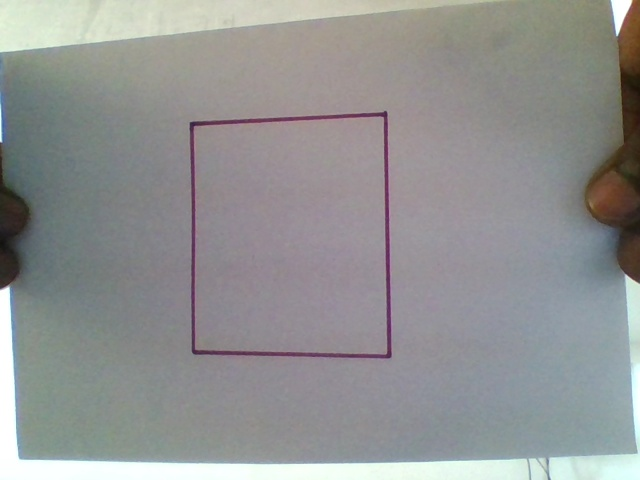 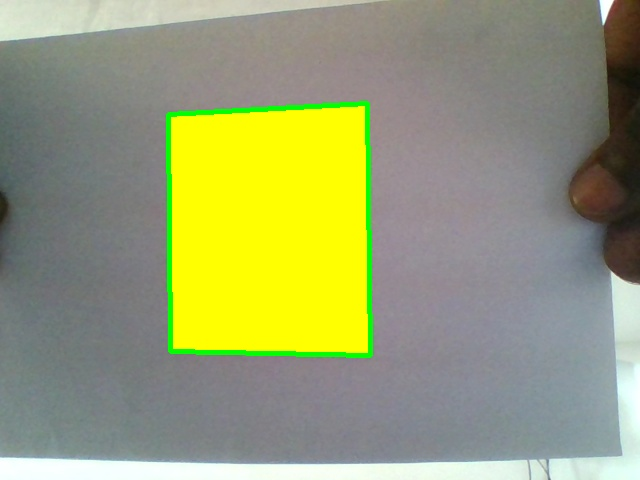


__Some tips on how to go about this :__

- Start with displaying a video. Display the feed from your webcam. In OpenCV, working with the live feed from webcam and working with a saved video is almost the same.
- While displaying the video, you will notice that we do it frame by frame. Now the job boils down to finding and filling this box in each frame.
- Read a frame from the input, find the coordinates of the box from the frame. Some of the things discussed in this tutorial can help you with this.
- Once you have the coordinates, you have to fill the area of the box represented by these coordinates with some colour. Find an OpenCV function that can do this for you.
- Display the frame after painting.